# EXPLORATORY DATA ANALYSIS FOR GLASSDOOR SALARY ESTIMATION


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Lets read the data that was cleaned earlier 

In [2]:
df = pd.read_csv('clean_data.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python,R,spark,excel,aws
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,Albuquerque,0,47,1,0,0,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,Linthicum,0,36,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,Clearwater,1,10,1,0,1,1,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,Richland,1,55,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,New York,1,22,1,0,0,1,0


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'same_state', 'age', 'python',
       'R', 'spark', 'excel', 'aws'],
      dtype='object')

In [5]:
df.columns.value_counts()

Founded                     1
job_state                   1
Rating                      1
python                      1
Company Name                1
Sector                      1
spark                       1
employer_provided_salary    1
company_txt                 1
age                         1
aws                         1
min_salary                  1
excel                       1
Location                    1
Job Title                   1
same_state                  1
avg_salary                  1
Revenue                     1
hourly                      1
Headquarters                1
Type of ownership           1
Size                        1
R                           1
max_salary                  1
Competitors                 1
Salary Estimate             1
Industry                    1
Job Description             1
dtype: int64

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'ml'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    

In [7]:
df['job_simplified'] = df['Job Title'].apply(title_simplifier)

In [8]:
df.drop('jod_simplified',axis=1,inplace=True)

KeyError: "['jod_simplified'] not found in axis"

In [ ]:
df['job_simplified'].value_counts()

In [9]:
df['seniorty'] = df['Job Title'].apply(seniority)

In [10]:
df['seniorty'].value_counts()

na        520
senior    220
jr          2
Name: seniorty, dtype: int64

In [11]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python,R,spark,excel,aws,job_simplified,seniorty
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Albuquerque,0,47,1,0,0,1,0,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,Linthicum,0,36,1,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,Clearwater,1,10,1,0,1,1,0,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,Richland,1,55,1,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,New York,1,22,1,0,0,1,0,data scientist,na


In [12]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python,R,spark,excel,aws,job_simplified,seniorty
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Albuquerque,0,47,1,0,0,1,0,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,Linthicum,0,36,1,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,Clearwater,1,10,1,0,1,1,0,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,Richland,1,55,1,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,New York,1,22,1,0,0,1,0,data scientist,na


In [13]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,age,python,R,spark,excel,aws,job_simplified,seniorty
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,Albuquerque,0,47,1,0,0,1,0,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,Linthicum,0,36,1,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,Clearwater,1,10,1,0,1,1,0,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,Richland,1,55,1,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,New York,1,22,1,0,0,1,0,data scientist,na


In [14]:
df['min_salary'] = df.apply(lambda x: x['min_salary']*2 if x['hourly']==1 else x['min_salary'],axis=1)
df['max_salary'] = df.apply(lambda x: x['max_salary']*2 if x['hourly']==1 else x['max_salary'],axis=1)

In [15]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


# Exploratory Data Analysis

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Job Title                 742 non-null    object 
 1   Salary Estimate           742 non-null    object 
 2   Job Description           742 non-null    object 
 3   Rating                    742 non-null    float64
 4   Company Name              742 non-null    object 
 5   Location                  742 non-null    object 
 6   Headquarters              742 non-null    object 
 7   Size                      742 non-null    object 
 8   Founded                   742 non-null    int64  
 9   Type of ownership         742 non-null    object 
 10  Industry                  742 non-null    object 
 11  Sector                    742 non-null    object 
 12  Revenue                   742 non-null    object 
 13  Competitors               742 non-null    object 
 14  hourly    

In [17]:
df.describe()

,Rating,Founded,hourly,employer_provided_salary,min_salary,max_salary,avg_salary,same_state,age,python,R,spark,excel,aws
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.0,0.225067,0.522911,0.237197
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.0,0.417908,0.499812,0.425651
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.0,0.000000,1.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.0,0.000000,1.000000,0.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,0.0,1.000000,1.000000,1.000000


In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'same_state', 'age', 'python',
       'R', 'spark', 'excel', 'aws', 'job_simplified', 'seniorty'],
      dtype='object')

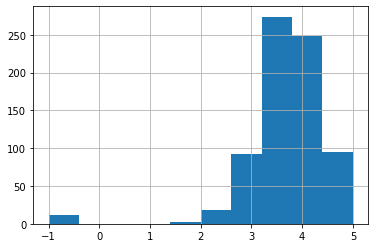

In [19]:
df['Rating'].hist()

In [20]:
import numpy as np
dum = np.log(df['Rating'])

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


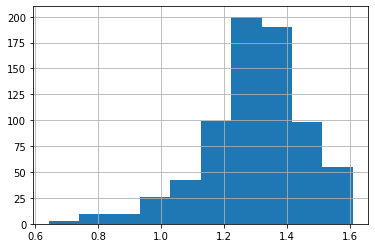

In [21]:
dum.hist()

## Here we can see that after taking log value of Rating it was normalized, where we can see that data was quite concentrated to the center

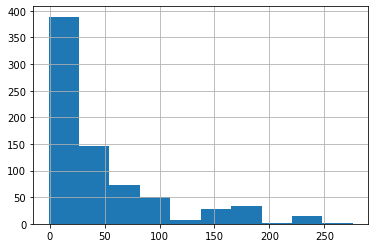

In [22]:
df['age'].hist();

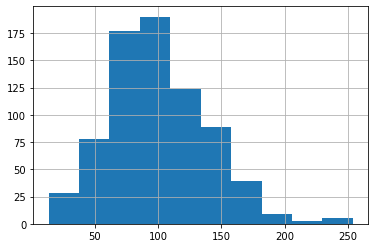

In [23]:
df['avg_salary'].hist()

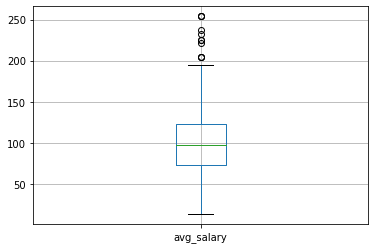

In [24]:
df.boxplot(column=['avg_salary']);

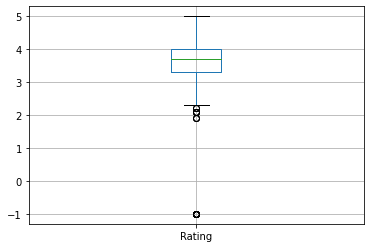

In [25]:
df.boxplot(column=['Rating']);

In [26]:
df.corr()

,Rating,Founded,hourly,employer_provided_salary,min_salary,max_salary,avg_salary,same_state,age,python,R,spark,excel,aws
Rating,1.000000,0.332927,-0.019531,-0.468234,-0.009573,0.027344,0.013492,0.085033,0.021655,0.144665,NaN,0.156982,-0.036466,0.117049
Founded,0.332927,1.000000,0.049313,-0.312761,-0.033999,0.006776,-0.015149,0.171512,0.134682,0.103183,NaN,0.066978,-0.035567,-0.011123
hourly,-0.019531,0.049313,1.000000,0.124748,-0.203556,-0.276730,-0.356082,-0.067351,0.007626,-0.193487,NaN,-0.098530,-0.099897,-0.030315
employer_provided_salary,-0.468234,-0.312761,0.124748,1.000000,0.187591,0.028794,0.076287,-0.081349,-0.109288,-0.107924,NaN,-0.082524,0.074129,-0.000685
min_salary,-0.009573,-0.033999,-0.203556,0.187591,1.000000,0.940136,0.967765,-0.051097,0.003110,0.326910,NaN,0.164671,-0.075234,0.168893
max_salary,0.027344,0.006776,-0.276730,0.028794,0.940136,1.000000,0.986862,-0.032784,0.034395,0.301481,NaN,0.171317,-0.067175,0.170911
avg_salary,0.013492,-0.015149,-0.356082,0.076287,0.967765,0.986862,1.000000,-0.034641,0.019655,0.327796,NaN,0.176559,-0.057252,0.171379
same_state,0.085033,0.171512,-0.067351,-0.081349,-0.051097,-0.032784,-0.034641,1.000000,-0.166680,0.006975,NaN,-0.053139,0.106026,-0.065070
age,0.021655,0.134682,0.007626,-0.109288,0.003110,0.034395,0.019655,-0.166680,1.000000,-0.099160,NaN,-0.102788,0.039033,-0.033081
python,0.144665,0.103183,-0.193487,-0.107924,0.326910,0.301481,0.327796,0.006975,-0.099160,1.000000,NaN,0.347619,-0.021519,0.203221


In [27]:
df['R'] = df['Job Description'].apply(lambda x: 1 if 'r studio' in x.lower() else 0)

In [28]:
df.corr()

,Rating,Founded,hourly,employer_provided_salary,min_salary,max_salary,avg_salary,same_state,age,python,R,spark,excel,aws
Rating,1.000000,0.332927,-0.019531,-0.468234,-0.009573,0.027344,0.013492,0.085033,0.021655,0.144665,-0.023806,0.156982,-0.036466,0.117049
Founded,0.332927,1.000000,0.049313,-0.312761,-0.033999,0.006776,-0.015149,0.171512,0.134682,0.103183,0.011819,0.066978,-0.035567,-0.011123
hourly,-0.019531,0.049313,1.000000,0.124748,-0.203556,-0.276730,-0.356082,-0.067351,0.007626,-0.193487,-0.006716,-0.098530,-0.099897,-0.030315
employer_provided_salary,-0.468234,-0.312761,0.124748,1.000000,0.187591,0.028794,0.076287,-0.081349,-0.109288,-0.107924,-0.005625,-0.082524,0.074129,-0.000685
min_salary,-0.009573,-0.033999,-0.203556,0.187591,1.000000,0.940136,0.967765,-0.051097,0.003110,0.326910,-0.011533,0.164671,-0.075234,0.168893
max_salary,0.027344,0.006776,-0.276730,0.028794,0.940136,1.000000,0.986862,-0.032784,0.034395,0.301481,-0.006625,0.171317,-0.067175,0.170911
avg_salary,0.013492,-0.015149,-0.356082,0.076287,0.967765,0.986862,1.000000,-0.034641,0.019655,0.327796,-0.007688,0.176559,-0.057252,0.171379
same_state,0.085033,0.171512,-0.067351,-0.081349,-0.051097,-0.032784,-0.034641,1.000000,-0.166680,0.006975,-0.041272,-0.053139,0.106026,-0.065070
age,0.021655,0.134682,0.007626,-0.109288,0.003110,0.034395,0.019655,-0.166680,1.000000,-0.099160,-0.016126,-0.102788,0.039033,-0.033081
python,0.144665,0.103183,-0.193487,-0.107924,0.326910,0.301481,0.327796,0.006975,-0.099160,1.000000,0.034712,0.347619,-0.021519,0.203221


# Let's observe the correlation using the heatmap

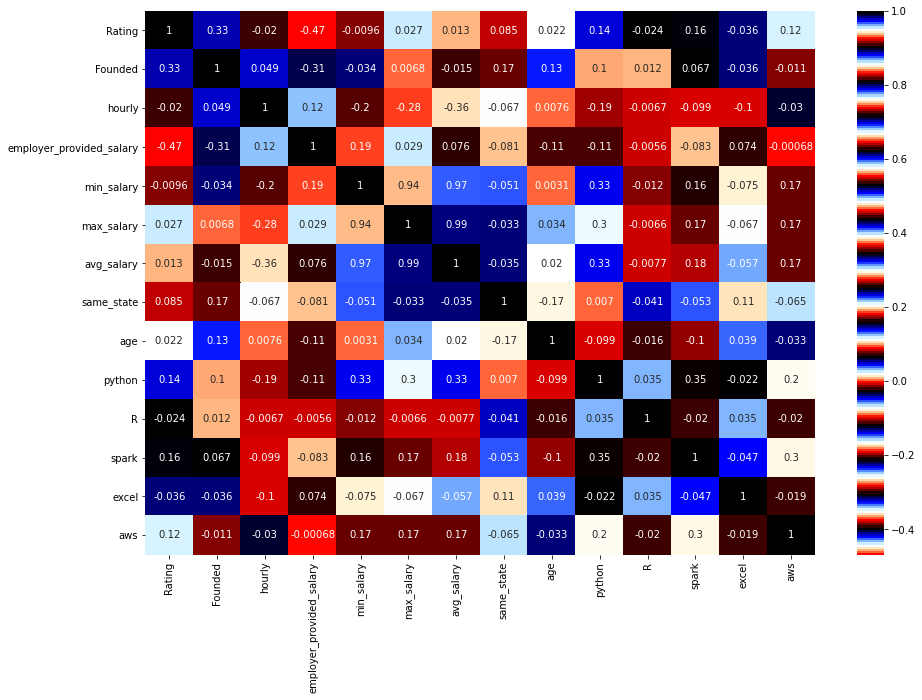

In [29]:
fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(df.corr(),annot=True,cmap='flag')

## Saving our beautiful heatmap to show in my github repo

In [30]:
fig.savefig("corr_heatmap.png")

In [31]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided_salary', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'same_state', 'age', 'python',
       'R', 'spark', 'excel', 'aws', 'job_simplified', 'seniorty'],
      dtype='object')

In [32]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

Job Title
Salary Estimate
Job Description
Company Name
Location
Headquarters
Size
Type of ownership
Industry
Sector
Revenue
Competitors
company_txt
job_state
job_simplified
seniorty


In [33]:
df_categorical=df[['Location','Headquarters','Size','Type of ownership','Industry','Sector','Revenue','company_txt','job_state','spark','aws','excel','job_simplified','seniorty']]

In [34]:
df_categorical.dtypes

Location             object
Headquarters         object
Size                 object
Type of ownership    object
Industry             object
Sector               object
Revenue              object
company_txt          object
job_state            object
spark                 int64
aws                   int64
excel                 int64
job_simplified       object
seniorty             object
dtype: object

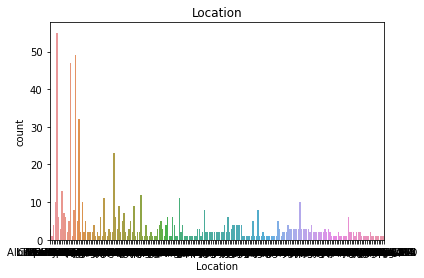

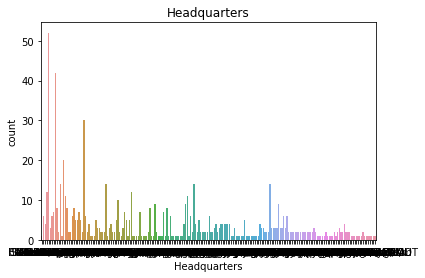

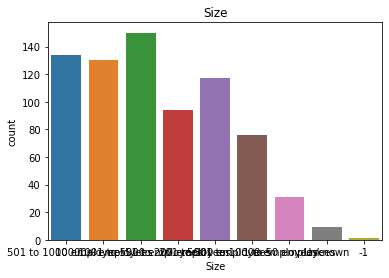

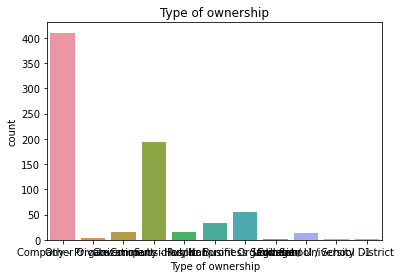

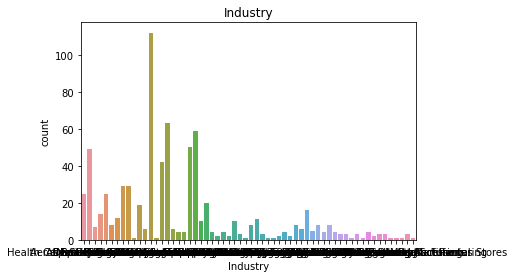

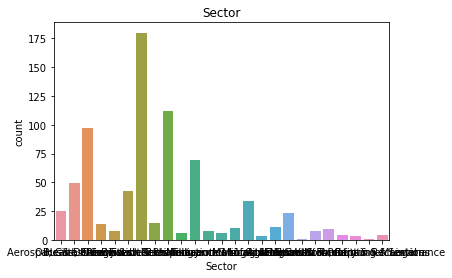

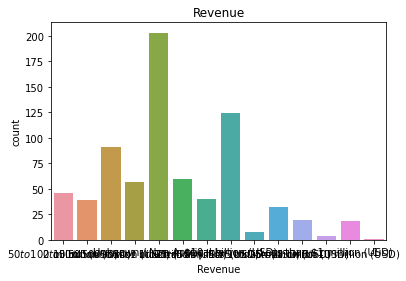

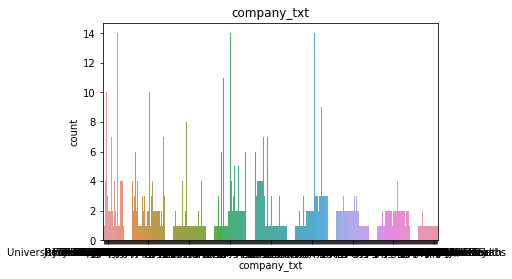

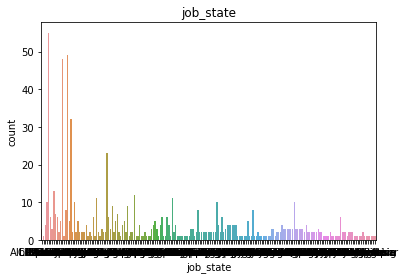

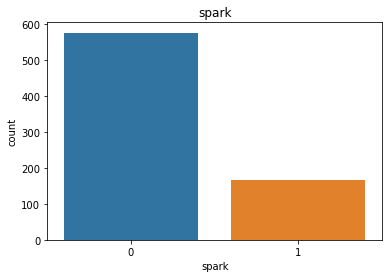

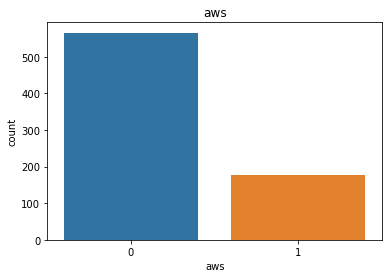

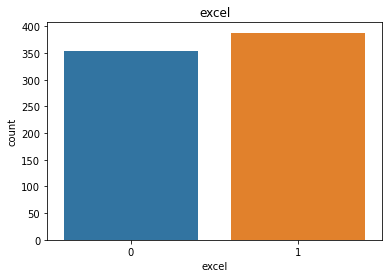

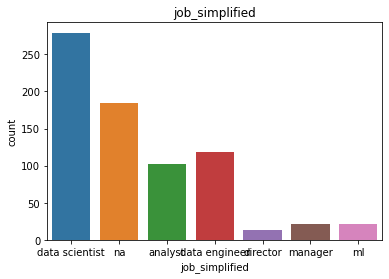

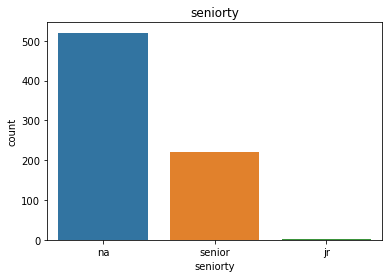

In [35]:
for i in df_categorical.columns:
    fig, ax = plt.subplots()
    ax =  sns.countplot(x=df_categorical[i],data=df_categorical)
    plt.title(i)
    plt.show()
    

In [36]:
fig.savefig("categorical.png")

In [37]:
pd.pivot_table(df,index='job_simplified',values="avg_salary")

,avg_salary
job_simplified,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
ml,126.431818
na,84.853261


In [38]:
pd.pivot_table(df,index=['job_simplified','seniorty'],values="avg_salary")

avg_salary
job_simplified seniorty            
analyst        jr         56.500000
               na         61.155405
               senior     79.092593
data engineer  na         96.701220
               senior    124.689189
data scientist jr        106.500000
               na        107.043011
               senior    138.956522
director       na        168.607143
manager        na         84.022727
ml             na        119.133333
               senior    142.071429
na             na         73.988189
               senior    109.061404

AttributeError: 'DataFrame' object has no attribute 'to'